In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import subprocess
import numpy as np
from Bio import SeqIO



from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

Using TensorFlow backend.


In [3]:
intr_file = 'hg19_intr_clean.fa'
depl_file = 'hg19_depl_clean.fa'

"""a = 0
intr_seqs = []
depl_seqs = []
for intr, depl in zip(SeqIO.parse(intr_file, 'fasta'), SeqIO.parse(depl_file, 'fasta')):
    cut = 1000
    if len(str(intr.seq)) < cut or len(str(depl.seq)) < cut:
        continue
    s_intr = str(intr.seq)[0:cut]
    s_depl = str(depl.seq)[0:cut]
    if s_intr.count('A')>0 and s_intr.count('C')>0 and s_intr.count('G')>0 and s_intr.count('T')>0 and \
    s_depl.count('A')>0 and s_depl.count('C')>0 and s_depl.count('G')>0 and s_depl.count('T')>0:
        intr_seqs.append(s_intr)
        depl_seqs.append(s_depl)
    a = a + 1
    if a%10000 == 0:
        print('Finished ' + str(a) + ' entries')"""

e = 0
intr_seqs = []
depl_seqs = []
for intr, depl in zip(SeqIO.parse(intr_file, 'fasta'), SeqIO.parse(depl_file, 'fasta')):
    
    #cutoff = 200
    #my_intr_seq = str(intr.seq)[0:cutoff]
    #my_depl_seq = str(depl.seq)[0:cutoff]
    #intr_seqs.append(my_intr_seq)
    #depl_seqs.append(my_depl_seq)
    
    step = 200; jump = 1; a = 0; b = step; n_jumps = 5
    for j in range(n_jumps):
        s_intr = str(intr.seq)[a:b]
        s_depl = str(depl.seq)[a:b]
        intr_seqs.append(s_intr)
        depl_seqs.append(s_depl)
        a = a + jump
        b = a + step
    
    e = e + 1
    if e%10000 == 0:
        print('Finished ' + str(e) + ' entries')
        
def getKmers(sequence, size):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]



def getKmers2(sequence, size):
    snt= [sequence[x*size:x*(size+1)].upper() for x in range(0,len(sequence)//(size+1))]
    out=np.zeros((4,len(snt)))
    mydict={"A":0,"C":1,"G":2,"T":3}
    for s in range(len(snt)):
        counts = Counter(snt[s])
        for l in set(snt[s]):
            out[mydict[l],s]=counts[l]
    display(pd.DataFrame(out))
    return(out)
    


kmer = 10
intr_texts = [(getKmers(i, kmer)) for i in intr_seqs]
depl_texts = [(getKmers(i, kmer)) for i in depl_seqs]


Finished 10000 entries
Finished 20000 entries
Finished 30000 entries
Finished 40000 entries
Finished 50000 entries
Finished 60000 entries
Finished 70000 entries


191


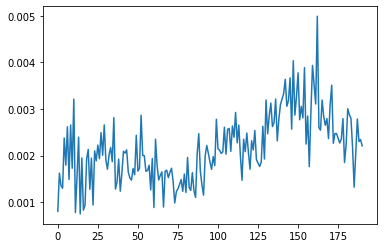

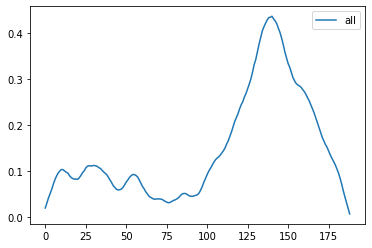

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from IPython.display import clear_output
intr_texts =np.array(intr_texts)
depl_texts =np.array(depl_texts) 
print(intr_texts.shape[1])
freqs_intr=[]

d0=np.loadtxt("important_locs_10_zeros_preds_.txt")
#d1=np.loadtxt("important_locs.txt")
datao = np.loadtxt("important_locs.txt")
datao=np.convolve(datao,[1,2,3,4,5,6,7,8,9,10,9,8,7,6,5,4,3,2,1], "same")
datao2=(datao[2:]-2*datao[1:-1]+datao[:-2])/sum(abs(datao))
plt.plot(d0)
plt.show()
#data2=np.array(np.convolve(data2,[1,2,3,4,5,6,5,4,3,2,1], "same"))
datao2=np.array(np.convolve(datao2,[1,2,3,4,5,6,5,4,3,2,1], "same"))
#dataz2=np.array(np.convolve(dataz2,[1,2,3,4,5,6,5,4,3,2,1], "same"))

datao=datao-min(datao)

datao2[datao2>0]=0


datao2[datao2<0]=1


datao2=np.concatenate((np.array([0.0,0.0]), datao2.astype(int)))







#plt.plot(range(len(datao)-2), (datao[2:])/sum((datao)), label="all")
plt.plot(range(len(datao)-2), (datao[2:]), label="all")
plt.legend()
plt.show()




#plt.plot(np.array(range(len(data2)))[data2<0], -data2[data2<0]+0.003, label="ones")
#plt.plot(np.array(range(len(dataz2)))[dataz2<0], -dataz2[dataz2<0], label="zero")
#plt.plot(np.array(range(len(datao2)))[datao2<0], -datao2[datao2<0]+0.006, label="all")
#plt.legend()
mydicti=Counter()







In [112]:
for i in range(intr_texts.shape[1]):

    counts = Counter(intr_texts[:,i])
    for k in counts.keys():
        counts[k]*=datao[i]
    mydicti+=counts
mydictd=Counter()    





for i in range(depl_texts.shape[1]):
    clear_output(wait=True)
    print(i)
    counts = Counter(depl_texts[:,i])
    for k in counts.keys():
        counts[k]*=datao[i]
    mydicti+=counts




190


In [113]:
print(np.array(mydicti.most_common(50))[:,0])
#print(np.array(mydicti.most_common(20))[:,0])

['TTTTTTTTTT' 'AAAAAAAAAA' 'TGTGTGTGTG' 'GTGTGTGTGT' 'CACACACACA'
 'ACACACACAC' 'TGTAATCCCA' 'CCTGTAATCC' 'CTGTAATCCC' 'TAATCCCAGC'
 'GTAATCCCAG' 'CTTTTTTTTT' 'ATATATATAT' 'CTCAGCCTCC' 'CCTCAGCCTC'
 'TATATATATA' 'CCCAGGCTGG' 'GCCTGTAATC' 'ACTTTGGGAG' 'CACTTTGGGA'
 'TGGGATTACA' 'TTTGGGAGGC' 'GCTGGGATTA' 'CCAGGCTGGA' 'GGAGGCTGAG'
 'CTTTGGGAGG' 'GGATTACAGG' 'AGGCTGGAGT' 'GGGATTACAG' 'CAGGCTGGAG'
 'GAGGCTGAGG' 'TTTTTTTTTG' 'AATCCCAGCA' 'AAAATACAAA' 'CTGGGATTAC'
 'AGCACTTTGG' 'GCTCACTGCA' 'AAATACAAAA' 'CAGCACTTTG' 'GCACTTTGGG'
 'GCCTCAGCCT' 'ATCCCAGCAC' 'TCCCAGCACT' 'GGCTGGAGTG' 'CCAGCACTTT'
 'CTGGAGTGCA' 'CCCAGCACTT' 'AAAAATACAA' 'GCTGGAGTGC' 'AAAAAAAAAG']


In [149]:
datao1=datao*datao2
datao1=datao1/sum(datao1)

In [150]:
#2nd der prescription
mydicti=Counter()


for i in range(intr_texts.shape[1]):

    counts = Counter(intr_texts[:,i])
    for k in counts.keys():
        counts[k]*=datao1[i]
    mydicti+=counts
mydictd=Counter()    


for i in range(depl_texts.shape[1]):
    clear_output(wait=True)
    print(i)
    counts = Counter(depl_texts[:,i])
    for k in counts.keys():
        counts[k]*=datao1[i]
    mydicti+=counts


print(np.array(mydicti.most_common(50))[:,0])

190
['TTTTTTTTTT' 'AAAAAAAAAA' 'TGTGTGTGTG' 'GTGTGTGTGT' 'CACACACACA'
 'ACACACACAC' 'TGTAATCCCA' 'CCTGTAATCC' 'CTGTAATCCC' 'TAATCCCAGC'
 'GTAATCCCAG' 'TATATATATA' 'ATATATATAT' 'CTTTTTTTTT' 'CTCAGCCTCC'
 'CCTCAGCCTC' 'CCCAGGCTGG' 'GCCTGTAATC' 'GCTGGGATTA' 'TGGGATTACA'
 'CACTTTGGGA' 'TTTGGGAGGC' 'ACTTTGGGAG' 'TTTTTTTTTG' 'GGGATTACAG'
 'AATCCCAGCA' 'GGATTACAGG' 'CCAGGCTGGA' 'GGAGGCTGAG' 'CTTTGGGAGG'
 'CTGGGATTAC' 'AAATACAAAA' 'AGGCTGGAGT' 'AAAATACAAA' 'CAGGCTGGAG'
 'GAGGCTGAGG' 'AGCACTTTGG' 'CAGCACTTTG' 'GCTCACTGCA' 'GCCTCAGCCT'
 'ATCCCAGCAC' 'GCACTTTGGG' 'TCCCAGCACT' 'AAAAATACAA' 'CCAGCACTTT'
 'CCCAGCACTT' 'GGCTGGAGTG' 'AATACAAAAA' 'TGCCTCAGCC' 'AAAAAAAAAG']


In [151]:
# no prescription
#freqs analysis

mydicti=Counter()


for i in range(intr_texts.shape[1]):

    counts = Counter(intr_texts[:,i])
    for k in counts.keys():
        counts[k]*=1
    mydicti+=counts
mydictd=Counter()    


for i in range(depl_texts.shape[1]):
    clear_output(wait=True)
    print(i)
    counts = Counter(depl_texts[:,i])
    for k in counts.keys():
        counts[k]*=1
    mydicti+=counts


print(np.array(mydicti.most_common(50))[:,0])

190
['TTTTTTTTTT' 'AAAAAAAAAA' 'TGTGTGTGTG' 'GTGTGTGTGT' 'CACACACACA'
 'ACACACACAC' 'TGTAATCCCA' 'CCTGTAATCC' 'CTGTAATCCC' 'TAATCCCAGC'
 'GTAATCCCAG' 'CTTTTTTTTT' 'ATATATATAT' 'TATATATATA' 'CTCAGCCTCC'
 'CCTCAGCCTC' 'CCCAGGCTGG' 'GGAGGCTGAG' 'TTTGGGAGGC' 'TGGGATTACA'
 'CACTTTGGGA' 'ACTTTGGGAG' 'GAGGCTGAGG' 'GCCTGTAATC' 'CTTTGGGAGG'
 'TTTTTTTTTG' 'GGATTACAGG' 'GGGATTACAG' 'GCTGGGATTA' 'CCAGGCTGGA'
 'AATCCCAGCA' 'CTGGGATTAC' 'AGGCTGGAGT' 'CAGGCTGGAG' 'AGCACTTTGG'
 'CAGCACTTTG' 'GCACTTTGGG' 'ATCCCAGCAC' 'TCCCAGCACT' 'CCAGCACTTT'
 'GCTCACTGCA' 'CCCAGCACTT' 'GGCTGGAGTG' 'CTGGAGTGCA' 'AAAATACAAA'
 'AAAAAAAAAG' 'GCTGGAGTGC' 'AAATACAAAA' 'GCCTCAGCCT' 'TTTTTTGAGA']


142
[['TTTTTTTTTT' '5721']
 ['AAAAAAAAAA' '4386']
 ['GTGTGTGTGT' '1351']
 ['TGTGTGTGTG' '1342']
 ['CACACACACA' '1265']
 ['ACACACACAC' '1263']
 ['TAATCCCAGC' '789']
 ['TGTAATCCCA' '757']
 ['CTGTAATCCC' '729']
 ['CCTGTAATCC' '725']
 ['GTAATCCCAG' '717']
 ['TATATATATA' '713']
 ['CTTTTTTTTT' '685']
 ['ATATATATAT' '670']
 ['AATCCCAGCA' '639']
 ['GGAGGCTGAG' '601']
 ['GAGGCTGAGG' '598']
 ['GGGATTACAG' '587']
 ['CCCAGGCTGG' '581']
 ['TCCCAGCACT' '580']
 ['CAGCACTTTG' '575']
 ['GGATTACAGG' '572']
 ['GCTGGGATTA' '570']
 ['ATCCCAGCAC' '566']
 ['TTTGGGAGGC' '562']
 ['CCAGCACTTT' '559']
 ['CTCAGCCTCC' '557']
 ['GCCTGTAATC' '553']
 ['TGGGATTACA' '550']
 ['CCCAGCACTT' '543']
 ['AGCACTTTGG' '537']
 ['CACTTTGGGA' '533']
 ['GCACTTTGGG' '528']
 ['ACTTTGGGAG' '525']
 ['CTTTGGGAGG' '523']
 ['TTTTTTTTTG' '521']
 ['CTGGGATTAC' '514']
 ['CCAGGCTGGA' '509']
 ['CCTCAGCCTC' '500']
 ['GCTCACTGCA' '486']
 ['CAGGCTGGAG' '470']
 ['CAAAAAAAAA' '466']
 ['AAAAAAAAAG' '466']
 ['TTTTCTTTTT' '465']
 ['AGGCTGGAGT' '465']


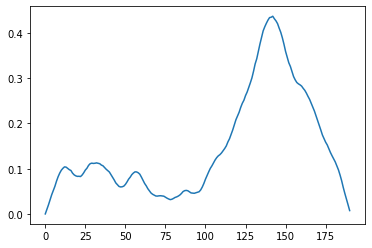

In [152]:
#just maxima 
maxpos=[]
maxdict=Counter() 
plt.plot(datao)

for i in range(len(datao)-1):
    if(datao[i]>datao[i-1] and datao[i]>datao[i+1]):
        maxpos.append(i)

    
for i in maxpos:
    counts = Counter(intr_texts[:,i])
    for k in counts.keys():
        counts[k]*=1
    maxdict+=counts
    
    
for i in maxpos:
    clear_output(wait=True)
    print(i)
    counts = Counter(depl_texts[:,i])
    for k in counts.keys():
        counts[k]*=1
    maxdict+=counts
print(np.array(maxdict.most_common(50)))